## Prophet 简介

Prophet是一种基于加性模型预测时间序列数据的程序，其中非线性趋势与年度，每周和每日季节性以及假日效应相吻合。它适用于具有强烈季节性影响和几季历史数据的时间序列。先知对于缺失数据和趋势的变化是强有力的，并且通常很好地处理异常值。



Facebook 2017年开源了一个时间序列预测的算法，叫做 fbprophet，它的官方网址与基本介绍来自于以下几个网站：

- Github：https://github.com/facebook/prophet
- 官方网址：https://facebook.github.io/prophet/
- 论文名字与网址：Forecasting at scale，https://peerj.com/preprints/3190/

从官网的介绍来看，Facebook 所提供的 prophet 算法不仅可以处理时间序列存在一些异常值的情况，也可以处理部分缺失值的情形，还能够几乎全自动地预测时间序列未来的走势。从论文上的描述来看，这个 prophet 算法是基于时间序列分解和机器学习的拟合来做的，其中在拟合模型的时候使用了 pyStan 这个开源工具，因此能够在较快的时间内得到需要预测的结果。除此之外，为了方便统计学家，机器学习从业者等人群的使用，prophet 同时提供了 R 语言和 Python 语言的接口。从整体的介绍来看，如果是一般的商业分析或者数据分析的需求，都可以尝试使用这个开源算法来预测未来时间序列的走势。。

## Python API 接口

In [8]:
# %load_ext rpy2.ipython
%matplotlib inline
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

Prophet遵循了sklearn 模型的API接口， 类Prophet的实例支持predict和fit。
Prophet的输入需要保持为两列，第一列为日期ds，格式最好是YYYY-MM-DD 或者 YYYY-MM-DD HH:MM:SS。另一列为预测值y，类型为数值型,如果自己数据集列名不是这两个，需要提前修改下。

下面我们以维基百科网站的历史日浏览量为例，介绍下如何在Python使用Prophet，数据集在Github:https://github.com/facebook/prophet/blob/master/examples/example_wp_log_peyton_manning.csv

In [10]:
# 导入数据
import pandas as pd
from fbprophet import Prophet

In [11]:
df = pd.read_csv('data/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [13]:
df.shape

(2905, 2)

我们通过实例化一个新Prophet对象来适应模型。预测过程的任何设置都将传递到构造函数中。然后调用其fit方法并传入历史数据，训练过程需要1-5秒

Prophet 的默认参数可以在 forecaster.py 中看到：
```


def __init__(
    self,
    growth='linear',
    changepoints=None,
    n_changepoints=25, 
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.80,
    uncertainty_samples=1000,
):
```

In [14]:
m = Prophet()
m.fit(df)

然后在数据框上ds进行预测，其中列包含要进行预测的日期,输入需要预测的时间序列的长度；

In [15]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [21]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203217,7.471647,8.889196
3266,2017-01-16,8.528203,7.816178,9.235849
3267,2017-01-17,8.315601,7.574549,9.041051
3268,2017-01-18,8.148207,7.432544,8.864306
3269,2017-01-19,8.160103,7.435104,8.877176


通过调用Prophet.plot方法并传入预测数据框来绘制预测图。

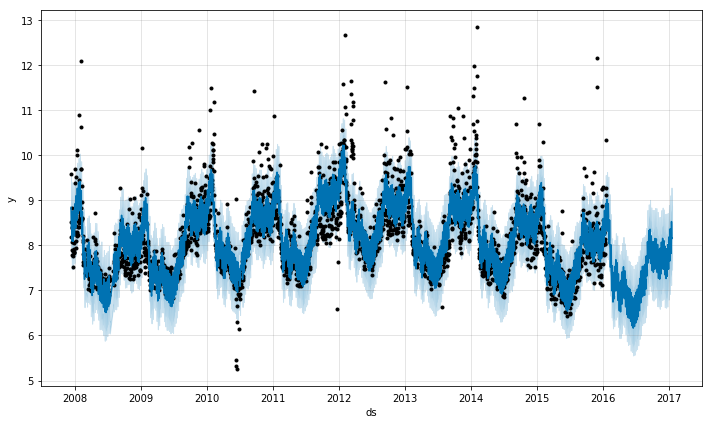

In [20]:
# Python
fig1 = m.plot(forecast)

查看时间序列的趋势，年度季节性和每周季节性

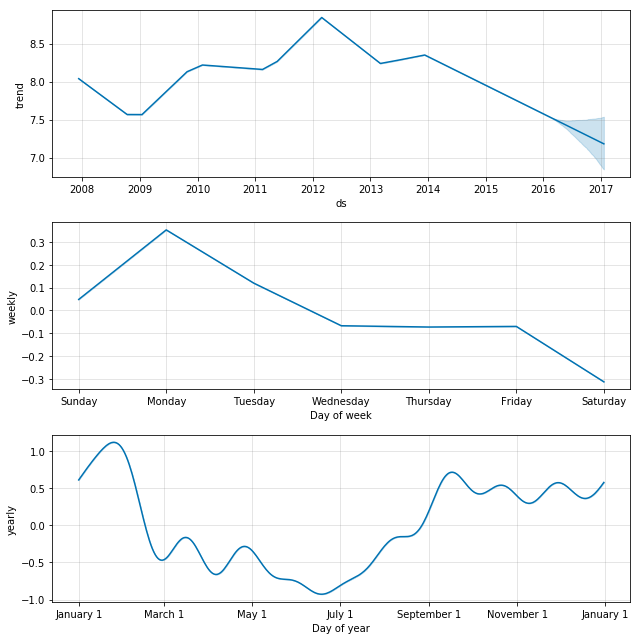

In [19]:
# Python
fig2 = m.plot_components(forecast)